**<u>Introduction: What is a Naive Bayes Classifier?</u>**

Naive Bayes classifiers are a family of simple yet powerful classification algorithms. They are especially useful for high-dimensional datasets and are widely used as baseline models due to their speed and simplicity.

These models are based on Bayesian probability and use Bayes’ Theorem to compute the probability of a class given some observed features. The theorem is stated as:
$$
P(L \mid \text{features}) = \frac{P(\text{features} \mid L) \cdot P(L)}{P(\text{features})}
$$


If we are choosing between two labels $ L_1 and  L_2 $ , we can compute the ratio of their posterior probabilities:

 $$
\frac{P(L_1 \mid \text{features})}{P(L_2 \mid \text{features})} = \frac{P(\text{features} \mid L_1)}{P(\text{features} \mid L_2)} \cdot \frac{P(L_1)}{P(L_2)}
$$


$P(\text{features} \mid L)$, we need a generative model for each class, which specifies how the features are distributed given a class label. While creating accurate generative models is complex, we simplify this by assuming that features are conditionally independent given the class.


This leads us to the "naive" assumption, resulting in the following simplified posterior probability:

$$
P(Y \mid X) = P(Y) \cdot P(x_1 \mid Y) \cdot P(x_2 \mid Y, x_1) \cdots P(x_n \mid Y, x_1, \ldots, x_{n-1})
$$

Under the assumption that all features
𝑥
𝑖
x
i
​
  are conditionally independent given
𝑌
Y:

$$
P(Y = 1 \mid X) = \frac{P(Y = 1) \cdot P(x_1 \mid Y = 1) \cdots P(x_n \mid Y = 1)}{P(X)}
$$

Despite the strong independence assumption, Naive Bayes classifiers are often surprisingly effective and form the foundation of several specialized models tailored to different types of input data (e.g., text, categorical, continuous).

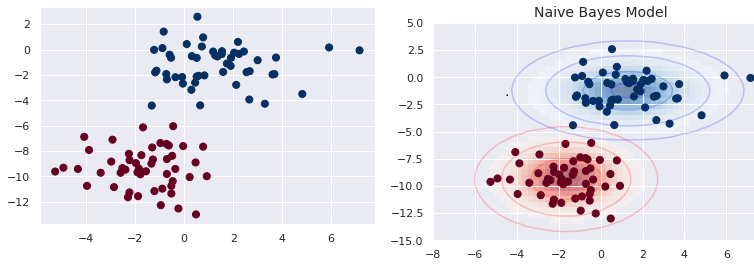

# Generative Models
What is a Generative Model?
A generative model models the joint probability distribution P(X,Y). That means it learns:

1.
P(Y): How likely each class is (class priors)

2.
P(X∣Y): How the data (features) is distributed for each class

It then uses Bayes' Theorem to compute P(Y∣X), the probability of a label given the features.

📌 Why “Generative”?
Because it can generate new samples of data
X given a label
Y. You can imagine it as:

"If I know it’s a spam email, how might it look?"

"If I know it’s a picture of a dog, how might its pixels be arranged?"



### 📧 Naive Bayes for Spam Detection (Detailed Explanation)

Suppose you're building an email spam classifier.

- **\( X \)**: the features (e.g., words in an email like `["win", "money", "now"]`)
- **\( Y \)**: the class label: `spam (1)` or `not spam (0)`

We want to compute the **posterior probability** of a class given the words in the email:

$$
P(Y \mid X) = \frac{P(X \mid Y) \cdot P(Y)}{P(X)}
$$

---

### 🧠 What Do These Terms Mean?

#### 1. **Prior Probability \( P(Y) \)**

This is the probability of a class occurring in the training data, before seeing any features.

Example:
$$
P(\text{spam}) = 0.4, \quad P(\text{not spam}) = 0.6
$$

#### 2. **Likelihood \( P(X \mid Y) \)**

This is the probability of the features (words) occurring given a particular class.  
Naive Bayes assumes **conditional independence** among features:

$$
P(X \mid Y) = P(x_1 \mid Y) \cdot P(x_2 \mid Y) \cdot \dots \cdot P(x_n \mid Y)
$$

Example for word "win":

$$
P(\text{"win"} \mid \text{spam}) = 0.7
$$

$$
P(\text{"win"} \mid \text{not spam}) = 0.05
$$

#### 3. **Marginal Likelihood (Evidence) \( P(X) \)**

This is the total probability of seeing the features across all classes:

$$
P(X) = P(X \mid Y=\text{spam}) \cdot P(\text{spam}) + P(X \mid Y=\text{not spam}) \cdot P(\text{not spam})
$$

This acts as a **normalizing constant** so that the posterior probabilities sum to 1.

#### 4. **Posterior Probability \( P(Y \mid X) \)**

This is what we ultimately want: the probability of each class given the features.

$$
P(Y \mid X) = \frac{P(X \mid Y) \cdot P(Y)}{P(X)}
$$

---

### 📌 Final Classification

The model predicts the class with the highest posterior:

$$
\hat{Y} = \arg\max_Y \, P(Y \mid X)
$$

---



## Generative Models
Generative models try to understand how the data is generated. They learn how the features and labels are related by modeling the underlying process that generates the data.
In essence, they learn patterns in the data and generate new data samples that are similar to the training data.

## Discriminative models
Discriminative models focus on separating classes by learning the decision boundary between them. They don't try to model how the data is generated; instead, they focus solely on how to distinguish between different classes based on the input features.

In [44]:
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv("/content/spam.csv")

In [46]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Feature Engineering

1. Lower casing

In [47]:
df['Message'] = df['Message'].str.lower()


In [48]:
df

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


2. Removal of punctuation

In [49]:
df['Message'] = df['Message'].str.replace(r'[^\w\s]', '', regex=True)

In [50]:
df

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


3. Word Tokenization

In [51]:
df['Message'] = df['Message'].str.split()


In [52]:
df

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


4. Stop word removal

In [53]:
import nltk
from nltk.corpus import stopwords

In [54]:
# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [56]:
# Define a function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [57]:
df['Message'] = df['Message'].apply(remove_stopwords)


In [58]:
df

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitching, acted, like, id, interested, b..."


In [59]:
df['Message'] = df['Message'].str.join(' ')


In [60]:
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

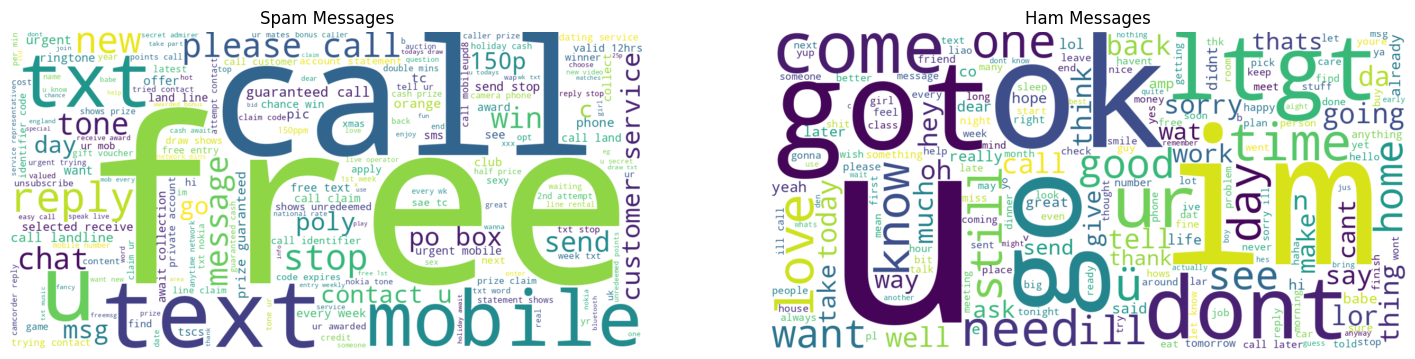

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all words from spam and ham messages
spam_words = ' '.join(df[df['Category'] == 'spam']['Message'])
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'])

# Initialize and generate word clouds for spam and ham
wordcloud_spam = WordCloud(width=1200, height=600, background_color='white').generate(spam_words)
wordcloud_ham = WordCloud(width=1200, height=600, background_color='white').generate(ham_words)

# Plotting the word clouds side by side with larger figure size
plt.figure(figsize=(18, 10))

# Plot for spam
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages')

# Plot for ham
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages')

plt.show()


5. Vectorizing

In [75]:
from sklearn.feature_extraction.text import CountVectorizer


In [76]:
vectorizer = CountVectorizer()


In [77]:
X = vectorizer.fit_transform(df['Message'])


In [78]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [79]:
X_df

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y_df=df["Category"]

In [69]:
y_df

,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [70]:
from sklearn.model_selection import train_test_split

# Assuming X_df is the feature matrix (after CountVectorizer)
# Assuming y_df is the target variable (e.g., spam or ham)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Preview the shapes of the split datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training set shape: (4457, 9419)
Test set shape: (1115, 9419)
Training labels shape: (4457,)
Test labels shape: (1115,)


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)





MultinomialNB()

In [72]:
# Evaluate the model performance
y_pred = nb_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9939421135292797

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3859
        spam       0.98      0.98      0.98       598

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457


Confusion Matrix:
[[3846   13]
 [  14  584]]


In [73]:
# Evaluate the model performance
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9730941704035875

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.87      0.93      0.90       149

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
[[946  20]
 [ 10 139]]


In [81]:
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download the NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocessing function (same steps as used during training)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text into words
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Return the preprocessed text (as space-separated words)
    return ' '.join(words)

# Example text input for prediction
input_text = "Congratulations! You've won a free ticket to the concert."

# Step 1: Preprocess the input text
preprocessed_text = preprocess_text(input_text)

# Step 2: Vectorize the preprocessed text using the same vectorizer from training
input_vector = vectorizer.transform([preprocessed_text])

# Step 3: Make prediction with the trained Naive Bayes model
prediction = nb_model.predict(input_vector)
prediction



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['spam'], dtype='<U4')